# WASP-12

In [1]:
import lightkurve as lk
import astropy.units as u
from glob import glob
import ombre as om
import numpy as np
import matplotlib.pyplot as plt

In [2]:
name = 'WASP-12'

In [3]:
fnames = np.asarray(glob(f'/Volumes/Nibelheim/hst/data/{name}/*.fits'))
obs = om.Observation.from_files(fnames)

<AxesSubplot:xlabel='Phase [JD]', ylabel='Normalized Flux'>

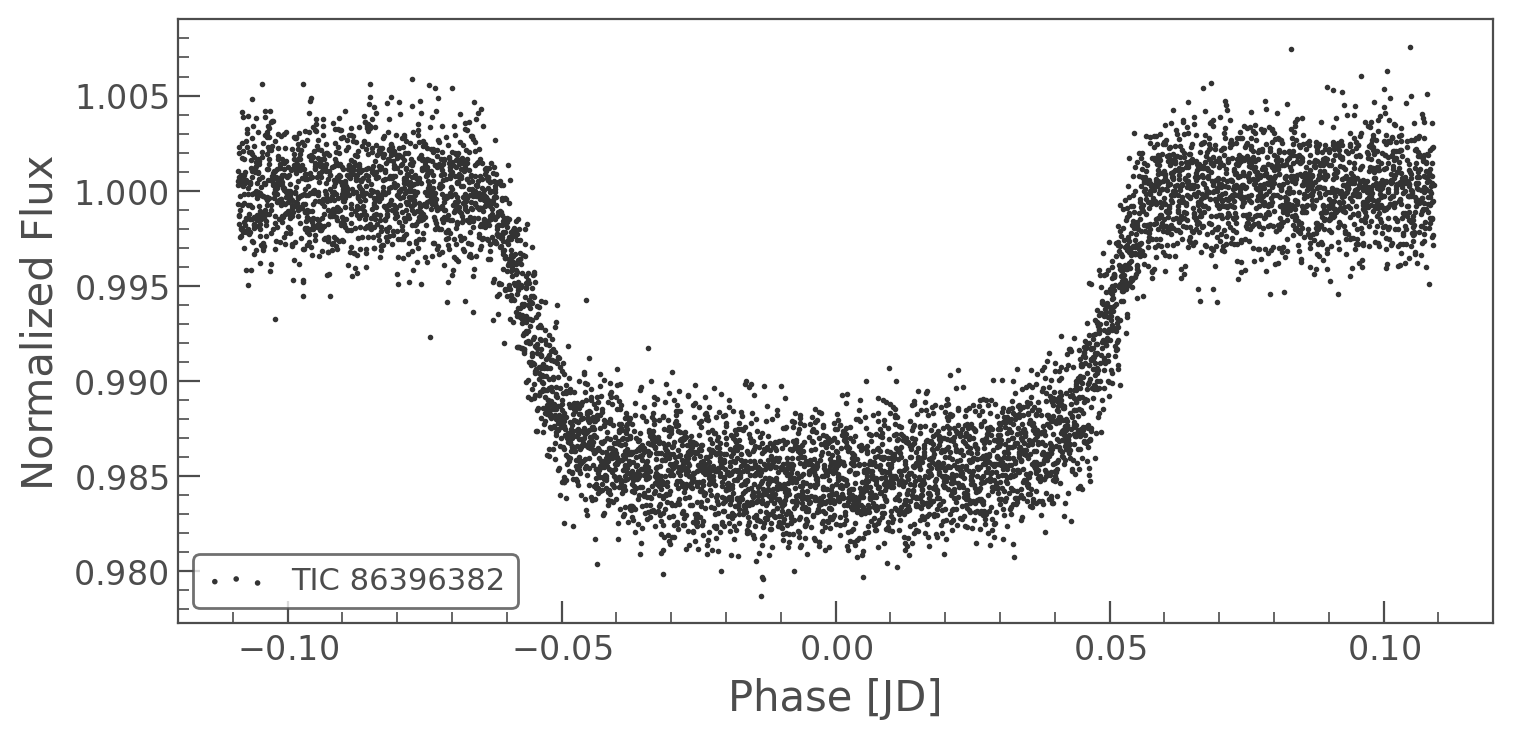

In [4]:
clc = lk.search_lightcurve(name, author='SPOC').download_all().stitch().remove_nans()
clc.flux = clc.flux.value * u.electron/u.s
clc.flux_err = clc.flux_err.value * u.electron/u.s
k = np.abs(((clc.time.value - (obs.t0 - 2457000 + obs.period/2))/obs.period) % 1 - 0.5) < 0.1
clc[k].fold(obs.period, obs.t0 - 2457000).scatter()

In [5]:
obs.fit_transit(x_suppl=clc.time.value + 2457000,
                y_suppl=clc.flux.value/np.median(clc.flux.value),
                yerr_suppl=clc.flux_err.value/np.median(clc.flux.value),
                exptime_suppl=np.median(np.diff(clc.time.value)), fit_t0=True, fit_period=True, fit_inc=True)

<AxesSubplot:xlabel='Phase', ylabel='$e^-s^{-1}$'>

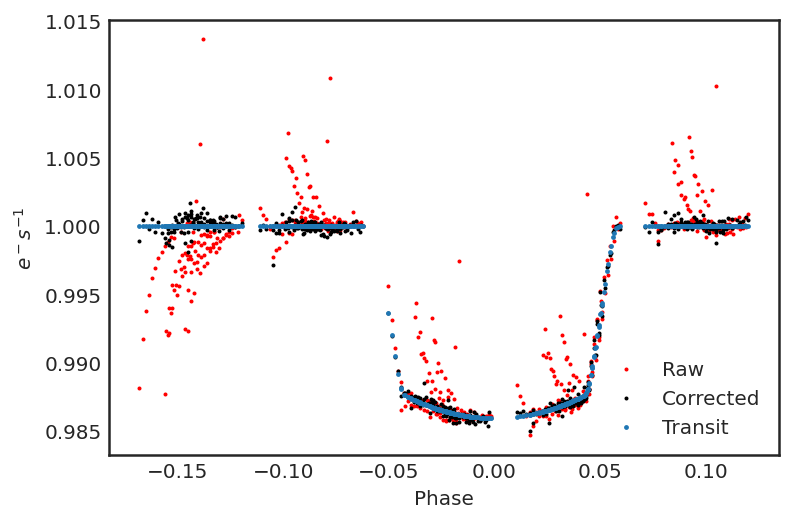

In [6]:
obs.plot()

In [7]:
obs.fit_model()

Fitting Transit/Eclipse Model:   0%|          | 0/12 [00:00<?, ?it/s]

Fitting Transit/Eclipse Model:   8%|▊         | 1/12 [00:08<01:31,  8.31s/it]

Fitting Transit/Eclipse Model:  17%|█▋        | 2/12 [00:16<01:20,  8.04s/it]

Fitting Transit/Eclipse Model:  25%|██▌       | 3/12 [00:26<01:23,  9.31s/it]

Fitting Transit/Eclipse Model:  33%|███▎      | 4/12 [00:36<01:15,  9.46s/it]

Fitting Transit/Eclipse Model:  42%|████▏     | 5/12 [00:44<01:02,  8.92s/it]

Fitting Transit/Eclipse Model:  50%|█████     | 6/12 [00:52<00:51,  8.65s/it]

Fitting Transit/Eclipse Model:  58%|█████▊    | 7/12 [00:59<00:40,  8.16s/it]

Fitting Transit/Eclipse Model:  67%|██████▋   | 8/12 [01:07<00:31,  7.92s/it]

Fitting Transit/Eclipse Model:  75%|███████▌  | 9/12 [01:17<00:25,  8.47s/it]

Fitting Transit/Eclipse Model:  83%|████████▎ | 10/12 [01:24<00:16,  8.04s/it]

Fitting Transit/Eclipse Model:  92%|█████████▏| 11/12 [01:31<00:07,  7.78s/it]

Fitting Transit/Eclipse Model: 100%|██████████| 12/12 [01:38<00:00,  7.47s/it]

Fitting Transit/Eclipse Model: 100%|██████████| 12/12 [01:38<00:00,  8.17s/it]

<AxesSubplot:title={'center':'WASP-12 Transmission Spectrum, Visit: 6'}, xlabel='Wavelength', ylabel='$\\delta$ Transit Depth [ppm]'>

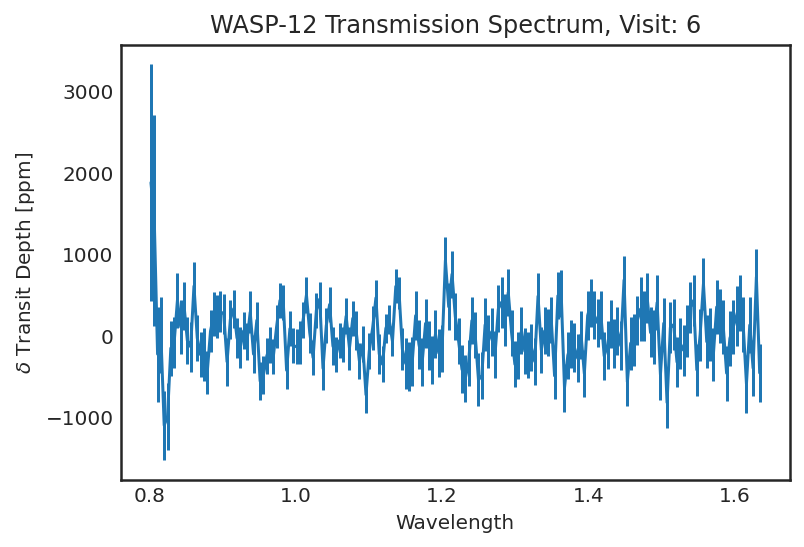

In [8]:
om.Spectra([visit.transmission_spectrum for visit in obs]).flatten().bin(bins=np.linspace(0.8, 1.7, 200)).plot()

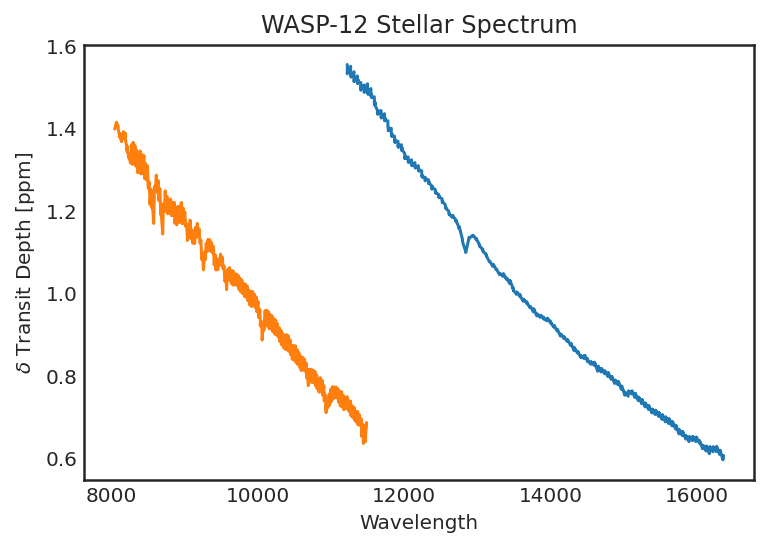

In [9]:
spec = obs.stellar_spectra
spec.plot()
spec.hdulist.writeto(f'results/{name}_stellar_spectrum.fits', overwrite=True)

In [10]:
from astropy.io import fits
try:
    hdulist = om.Spectra([visit.transmission_spectrum for visit in obs if visit.transmission_spectrum.spec.sum() != 0]).hdulist
    hdulist.writeto(f'results/{name}_transmission.fits', overwrite=True)
except:
    pass
try:    
    hdulist = om.Spectra([visit.emission_spectrum for visit in obs if visit.emission_spectrum.spec.sum() != 0]).hdulist
    hdulist.writeto(f'results/{name}_emission.fits', overwrite=True)
except:
    pass

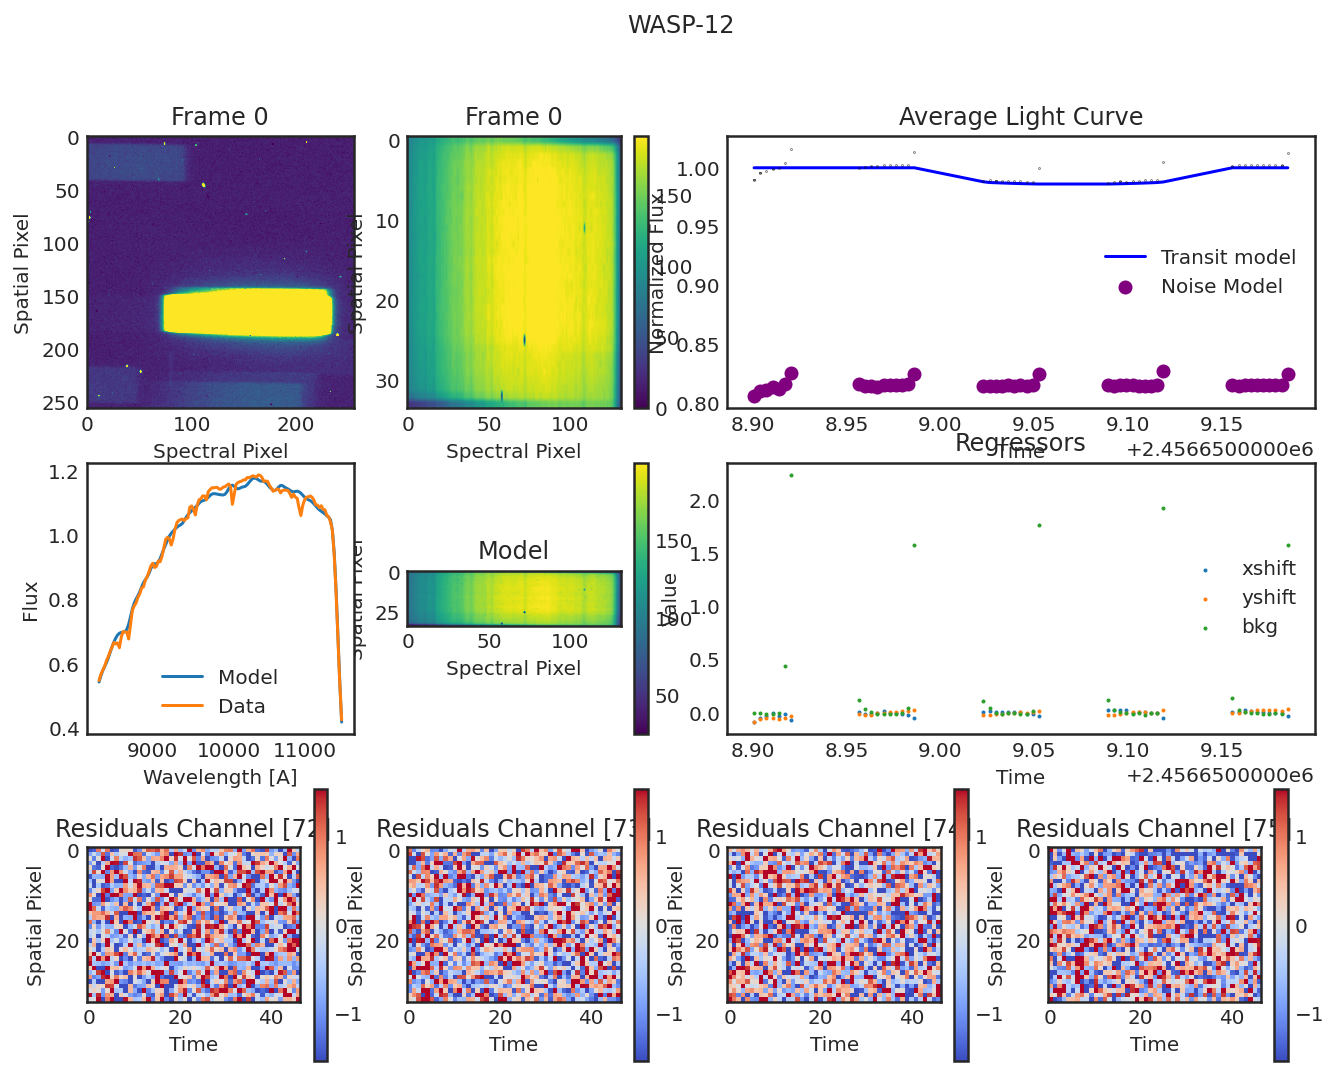

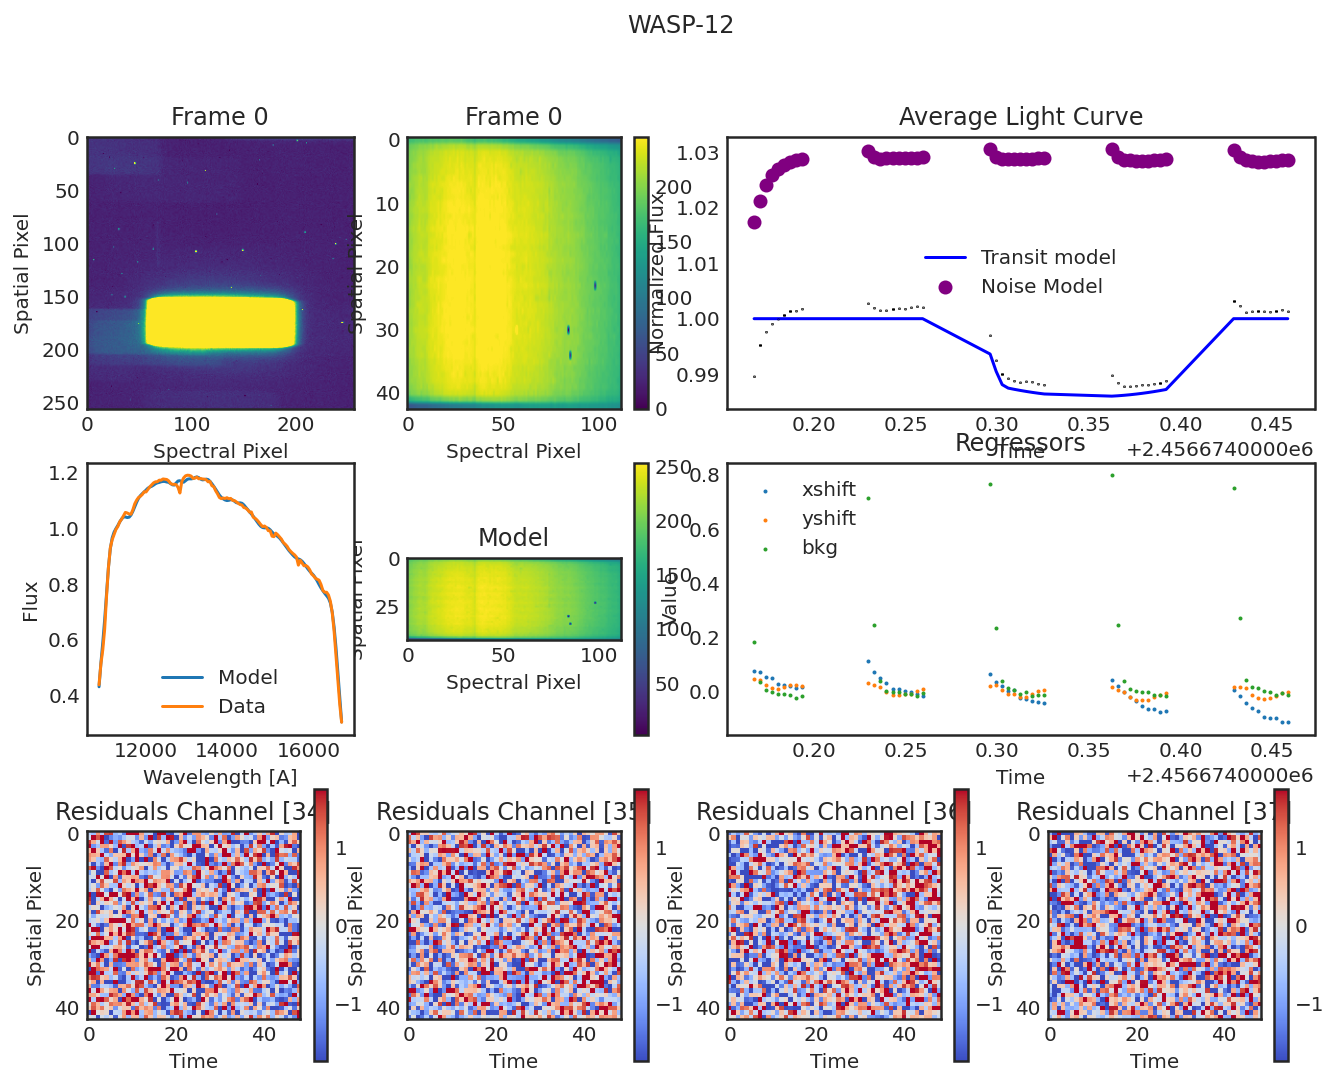

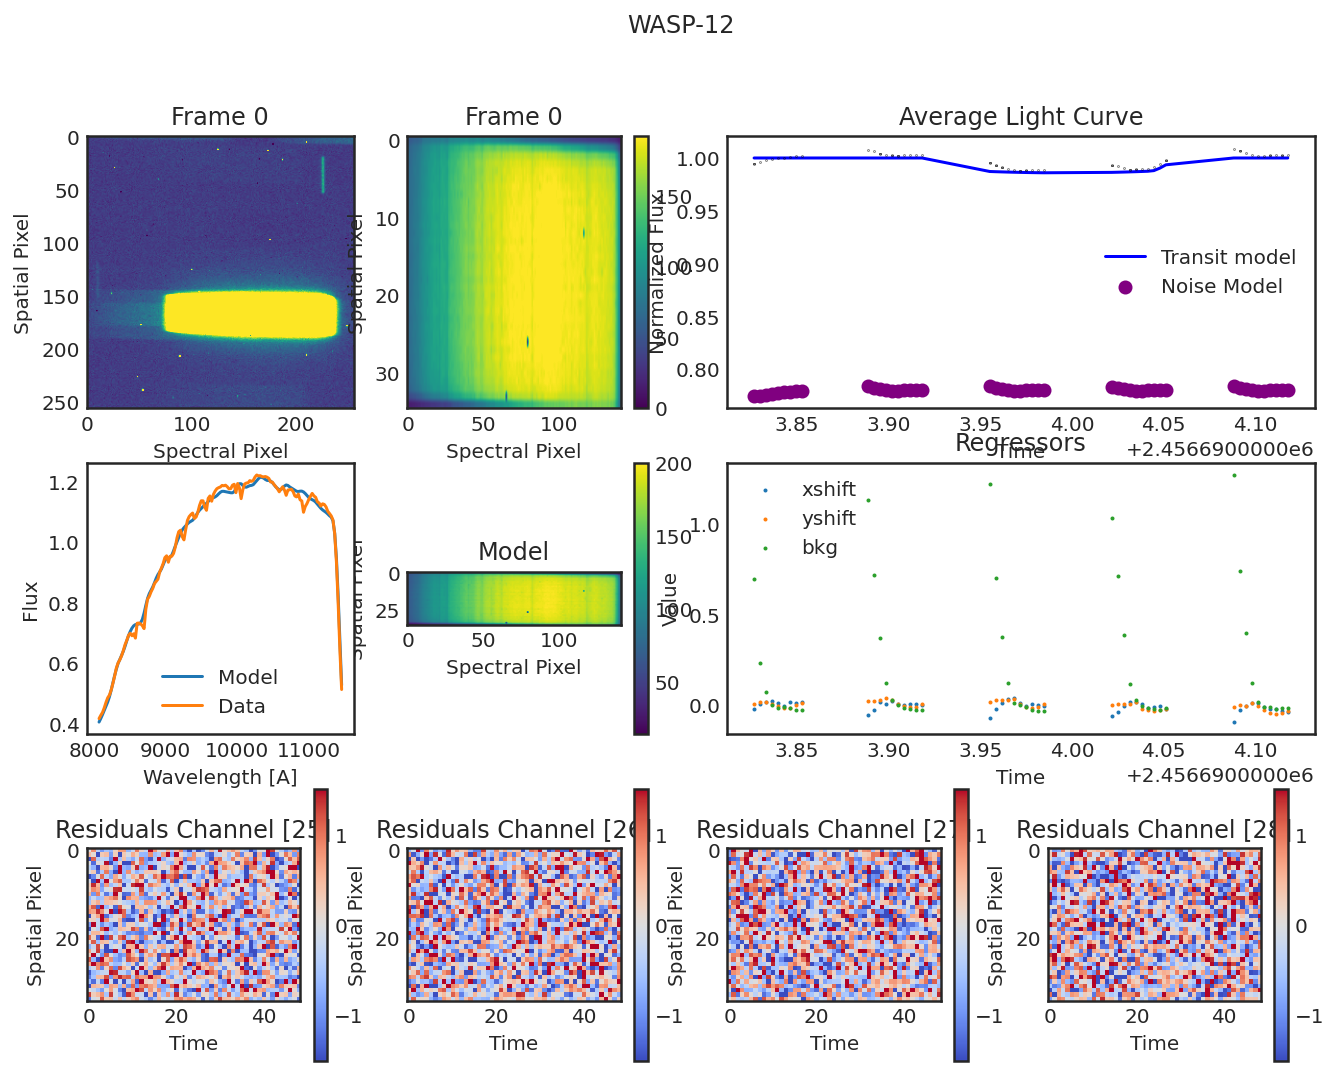

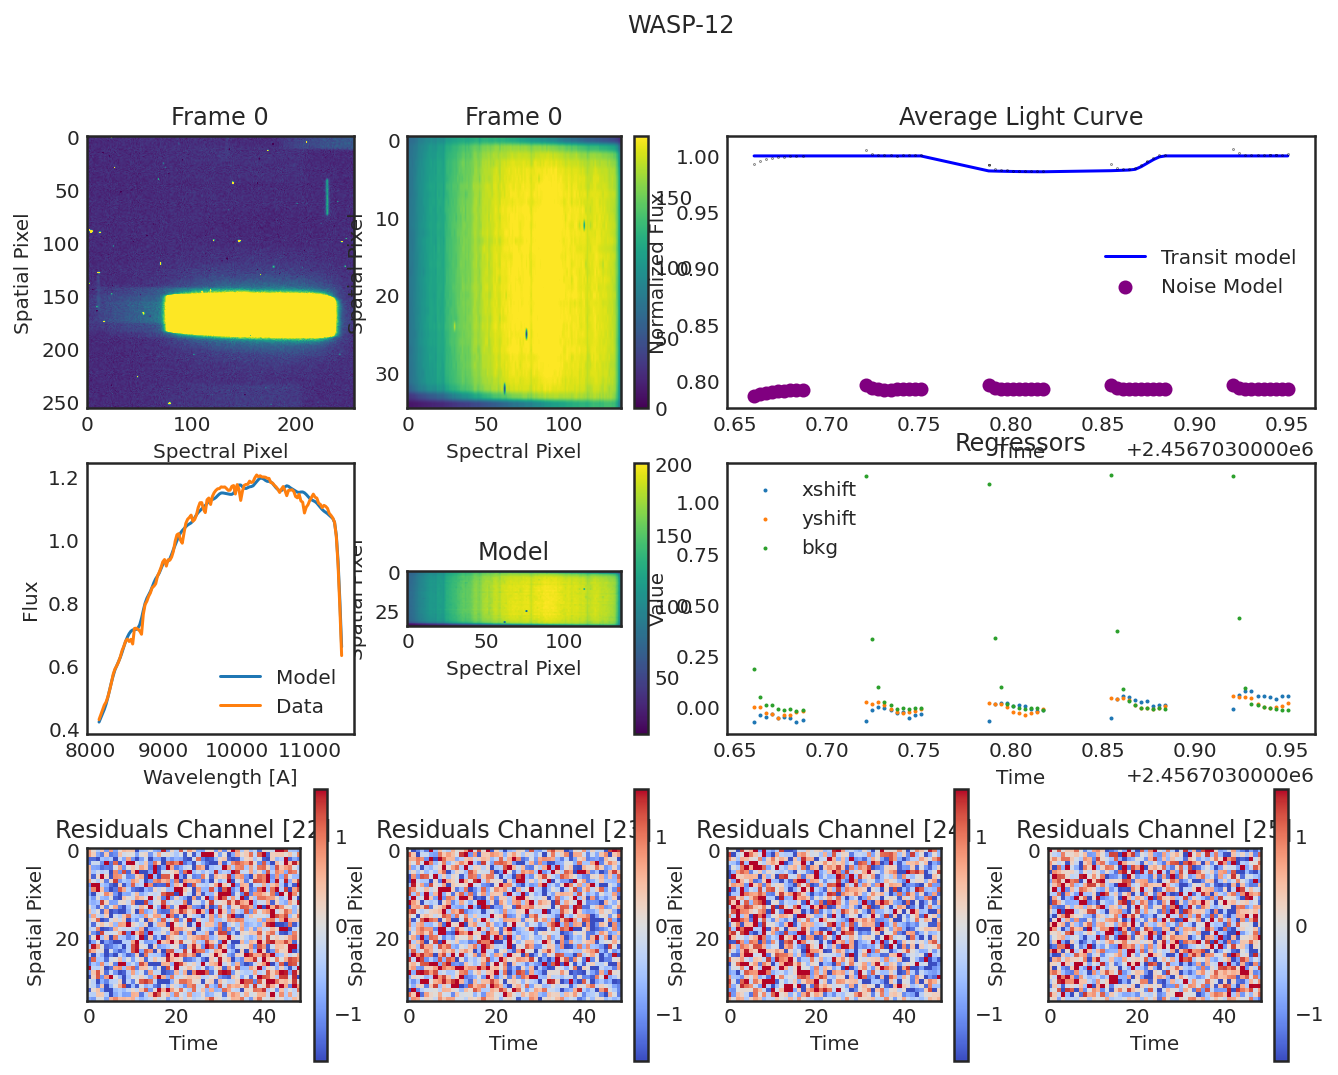

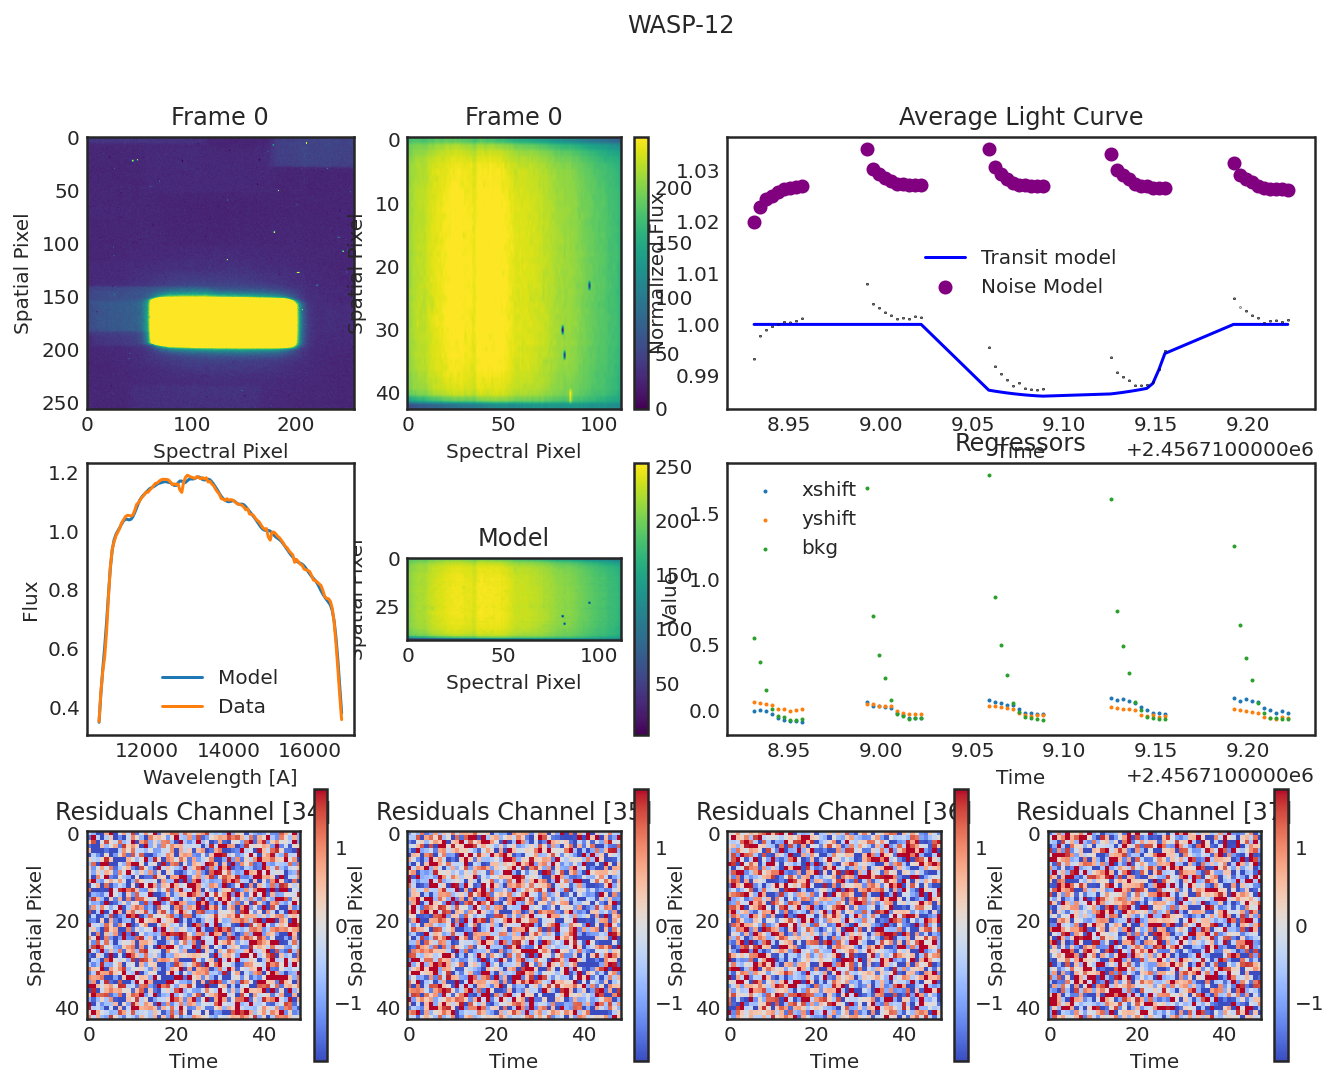

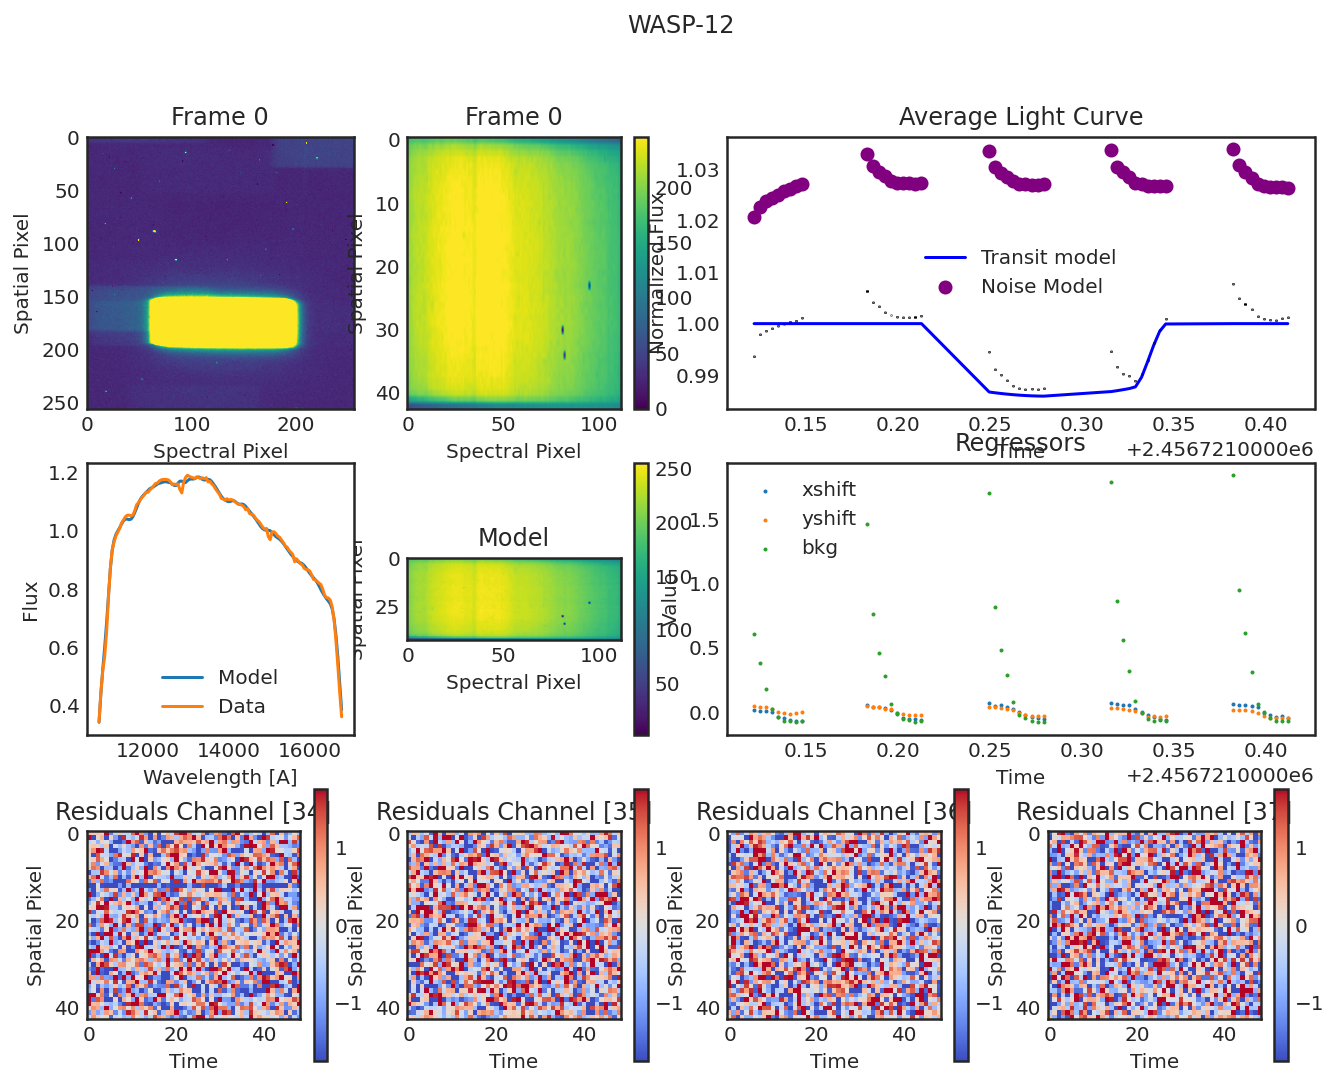

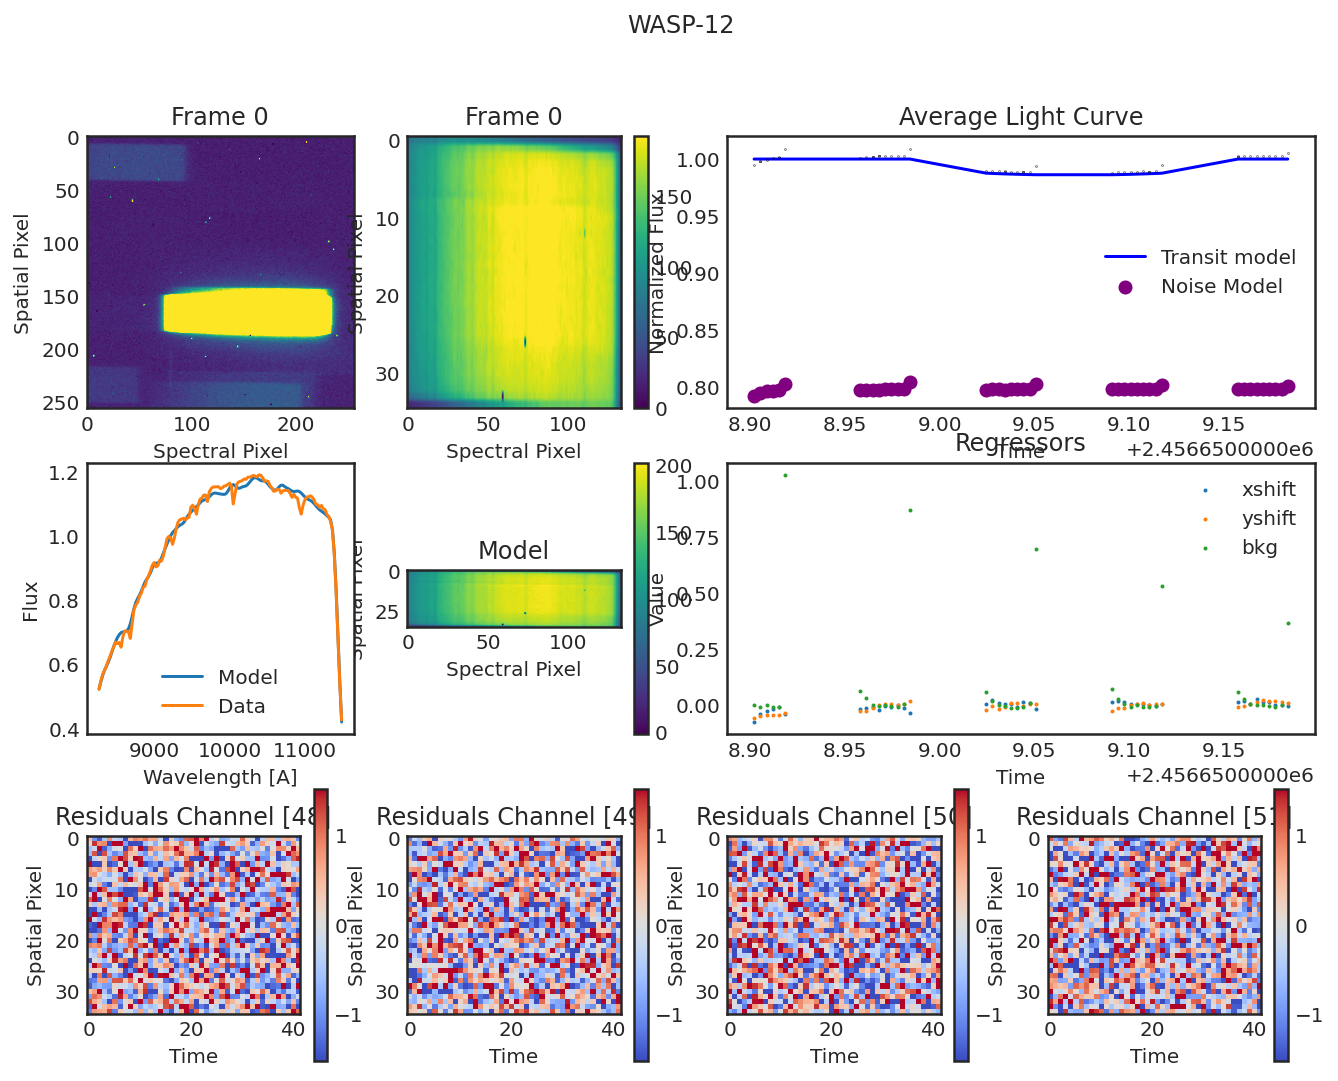

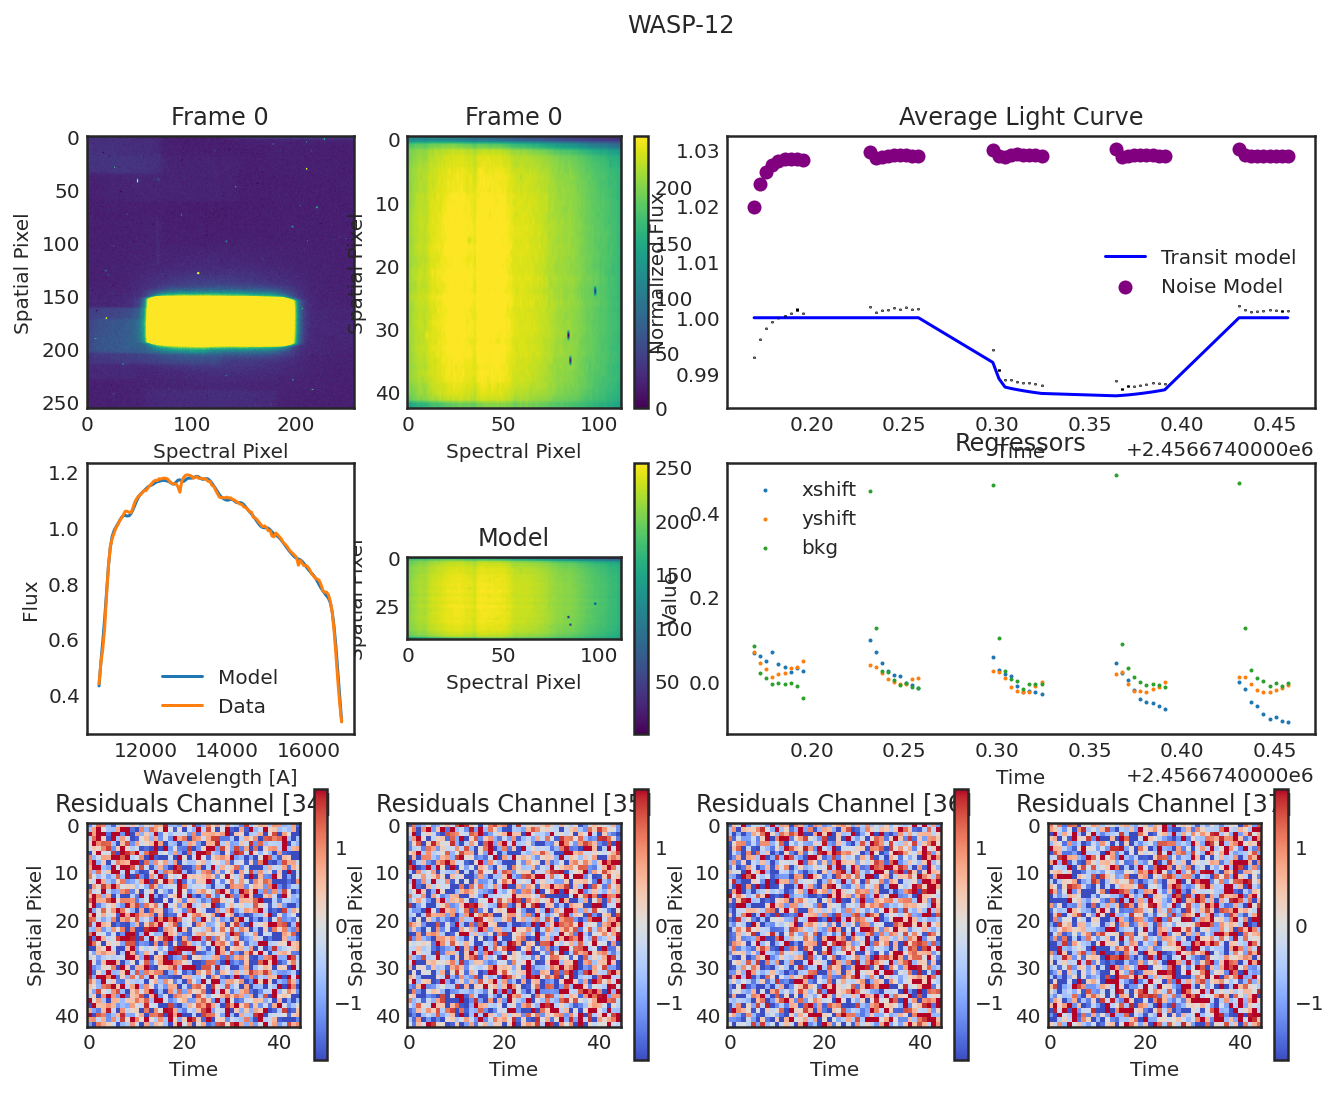

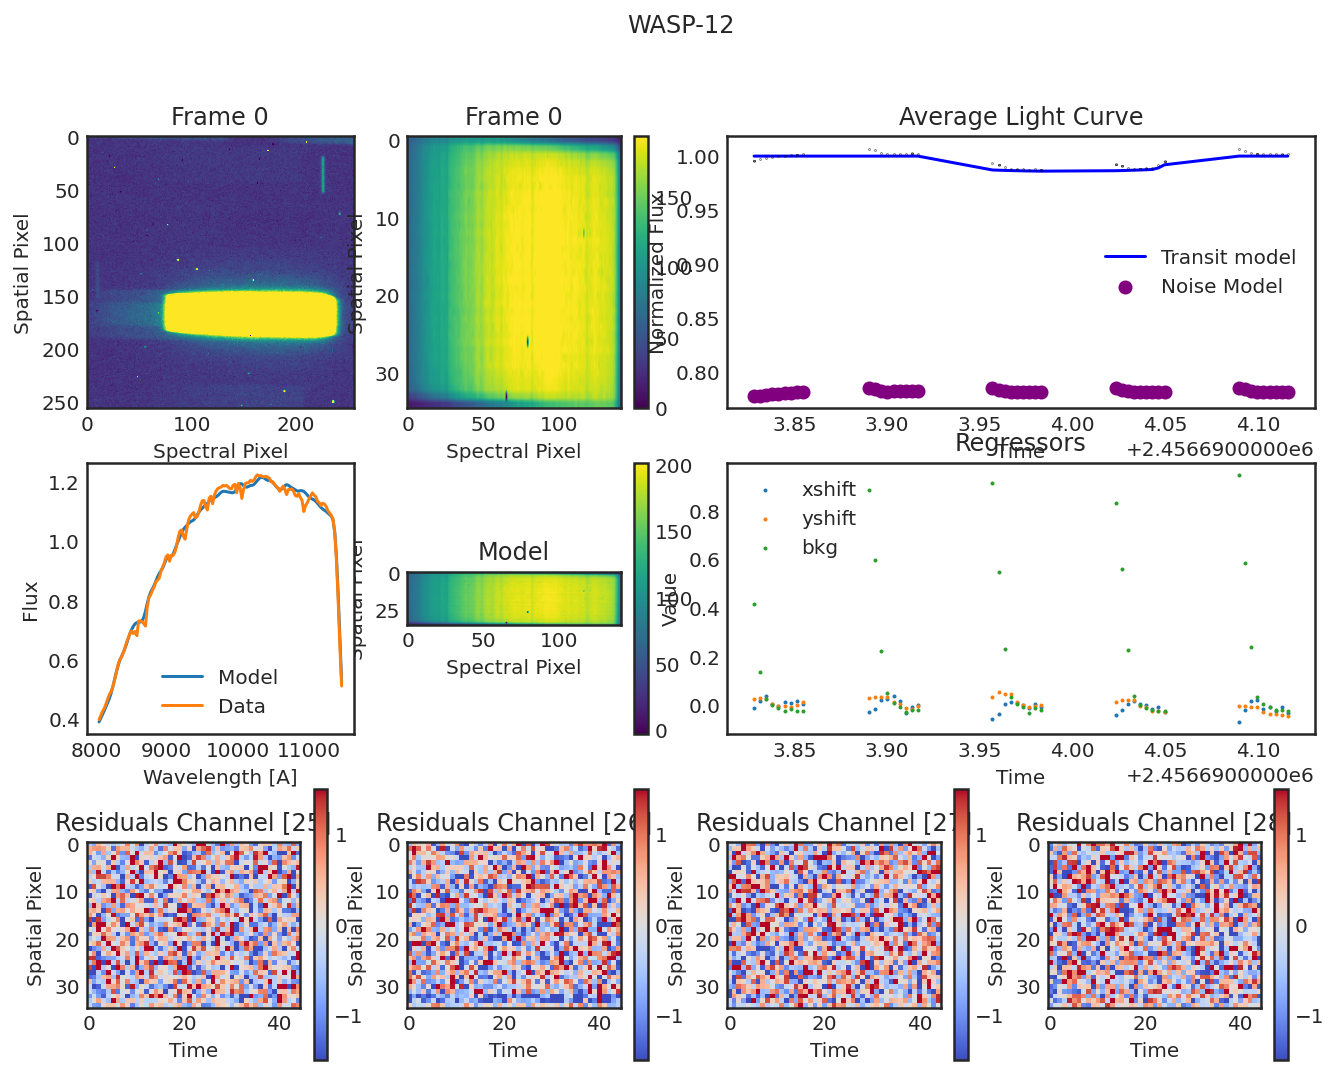

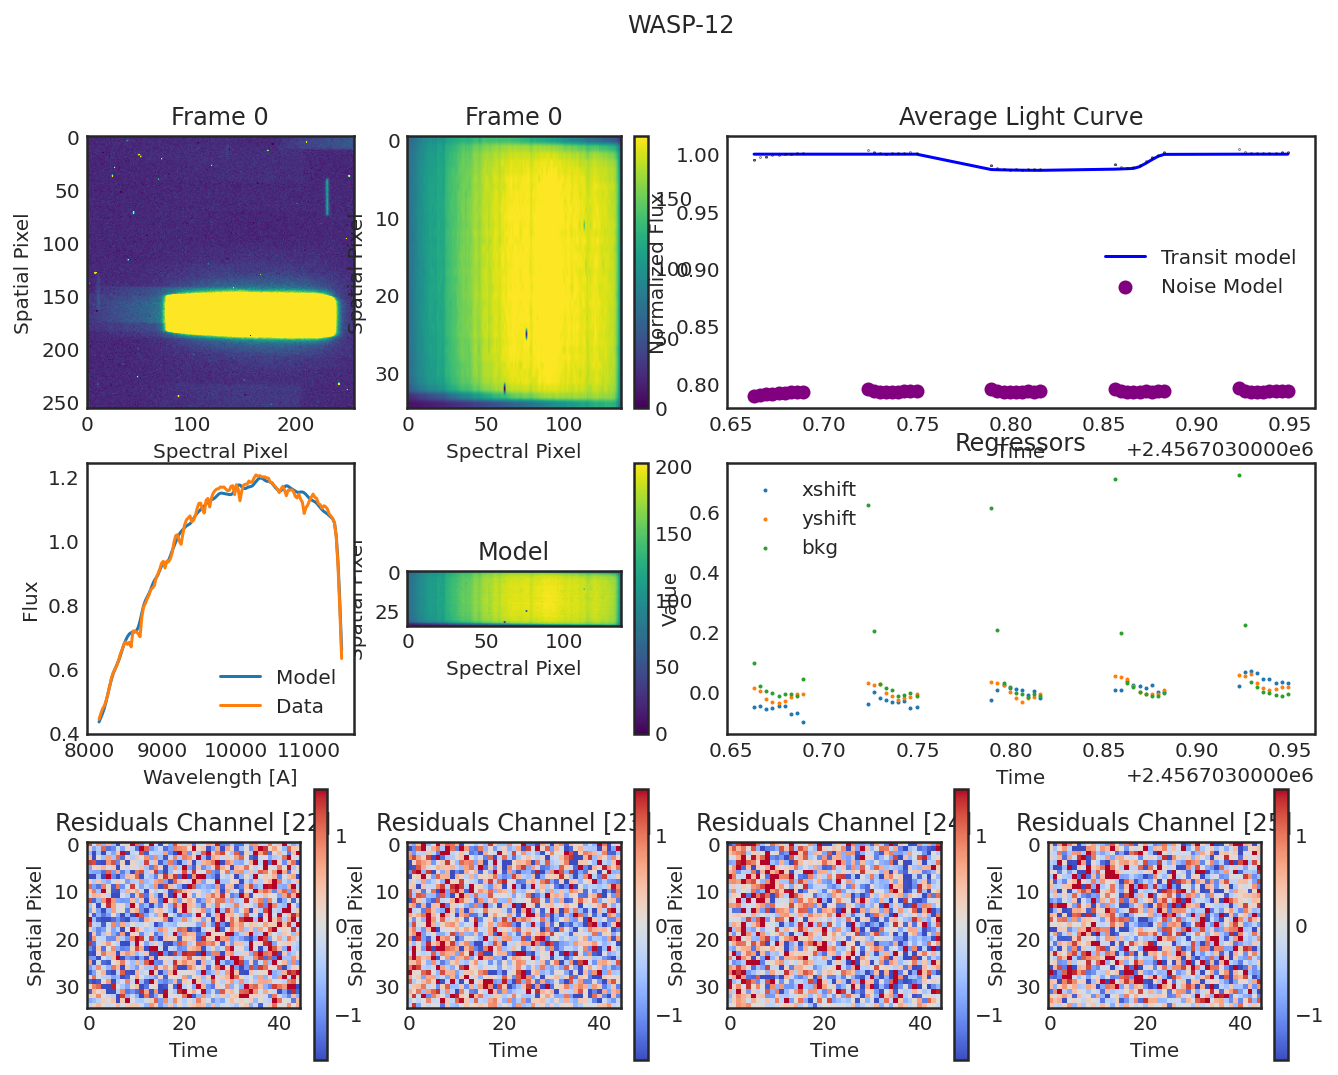

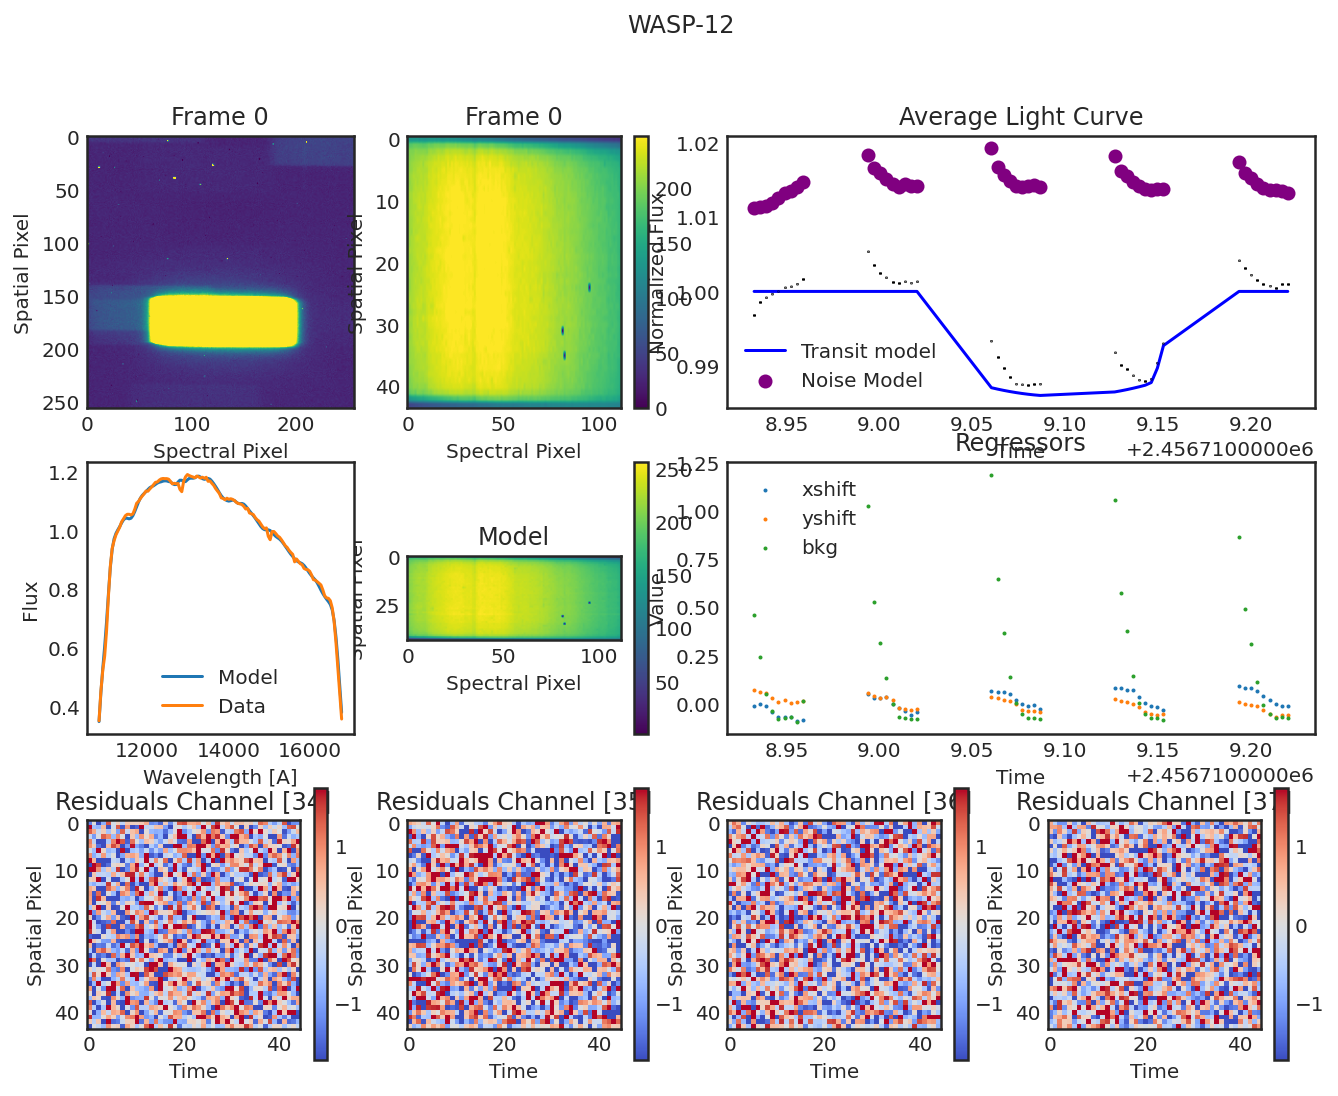

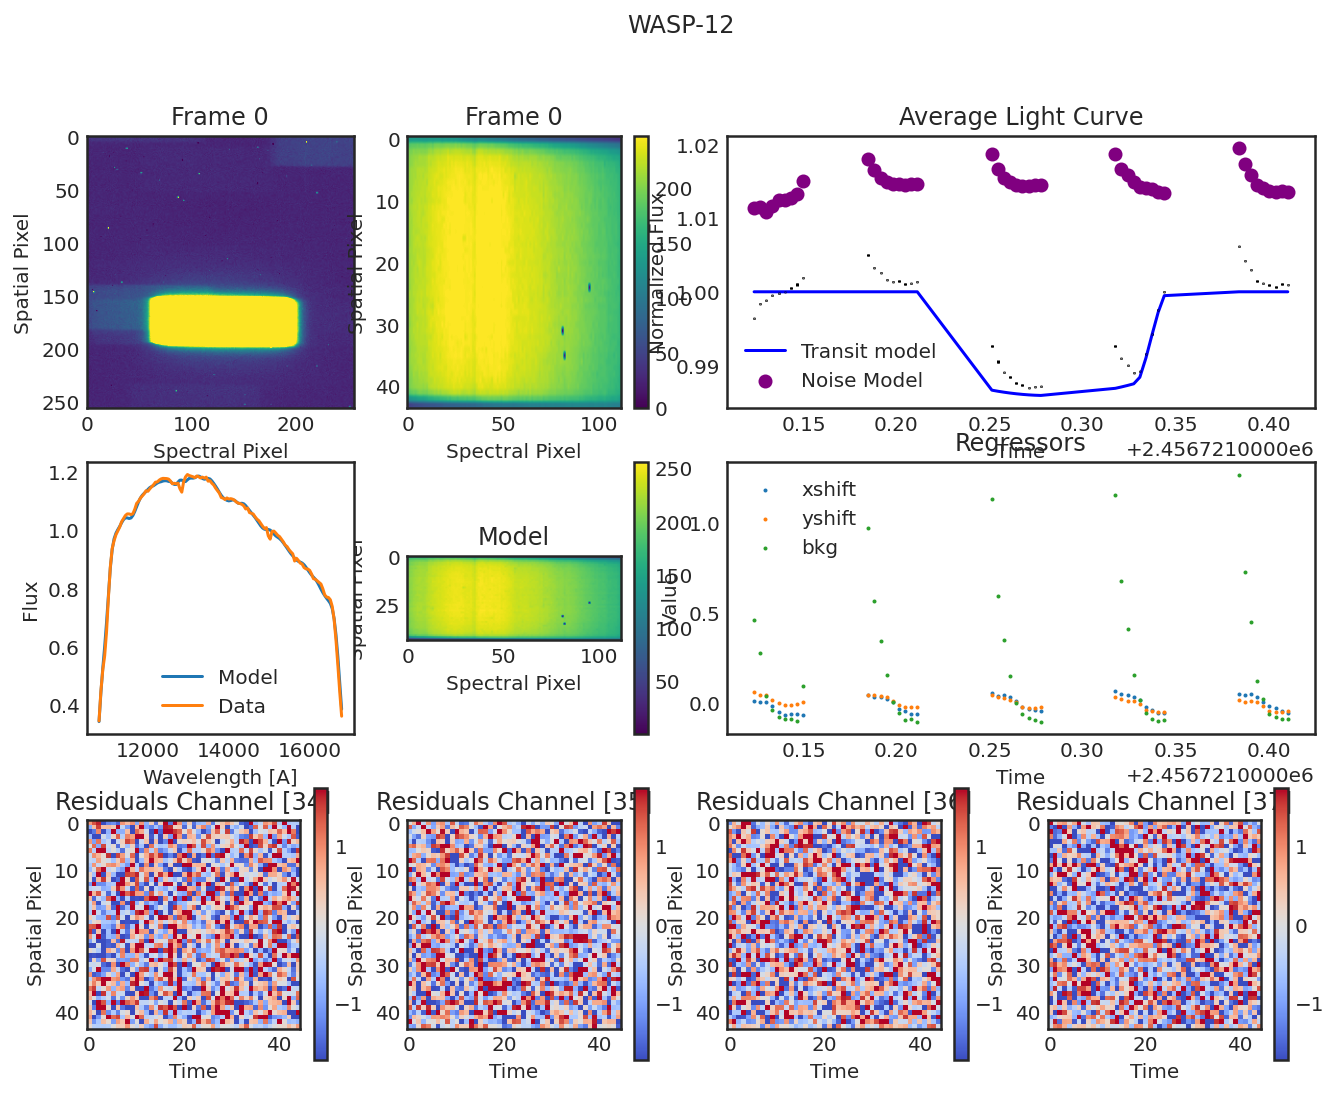

In [11]:
for visit in obs:
    visit.diagnose();
    plt.show();